In [50]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

import statsmodels.api as sm

#Load our two Data Frames
AmesDummies = pd.read_csv('AmesDummies.csv')
AmesDummiesOrdinal = pd.read_csv('AmesDummiesOrdinal.csv')

In [51]:
#Load the Forward Selection DF, which contains the list of Features to include in the linear model:
AmesFeatureDF = pd.read_csv('AmesDummiesForwardAICList.csv')

In [52]:
#Trim AmesDummiesOrdinal to a DF containing only the selected Features:
AmesDF = pd.concat([AmesDummiesOrdinal[list(AmesFeatureDF['CreatedFeatures'])],AmesDummiesOrdinal[['SalePrice']]], axis=1)

In [53]:
#As we can see, the trimmed DF has 120 total features removed, for a total of 67:
print(AmesDummiesOrdinal.shape)
print(AmesDF.shape)

(1458, 187)
(1458, 68)


In [54]:
#Initiate K-fold (n=5) cross-validation model to train/test:

import sklearn.model_selection as ms
ms_k5 = ms.KFold(n_splits=5, shuffle=True)

In [55]:
#Perform separate train/test validation runs for each of the 5 K-fold groups:

#Create X and Y variables
X = AmesDF.drop('SalePrice', axis=1)
Y = AmesDF['SalePrice']

#Instantiate the K-fold generator object:
np.random.seed(0)
AmesDF5Fold = ms_k5.split(AmesDF.drop('SalePrice', axis=1), AmesDF['SalePrice'])

#Produce list of test R^2 scores, and Actual vs Predicted lists for the individual runs
R2List = []
PredictList = []
ActualList = []

for train, test in AmesDF5Fold:
    lm.fit(X.iloc[train,], Y[train])
    p = lm.predict(X.iloc[test,])
    R2 = lm.score(X.iloc[test,], Y[test])
    R2List.append(R2)
    PredictList.append(p)
    ActualList.append(Y[test])

In [56]:
#What are the R^2 scores for each of our 5 runs?
R2List

[0.9074305944953698,
 0.8887032258902952,
 0.9144830640264883,
 0.8678770807710391,
 0.8856623257878165]

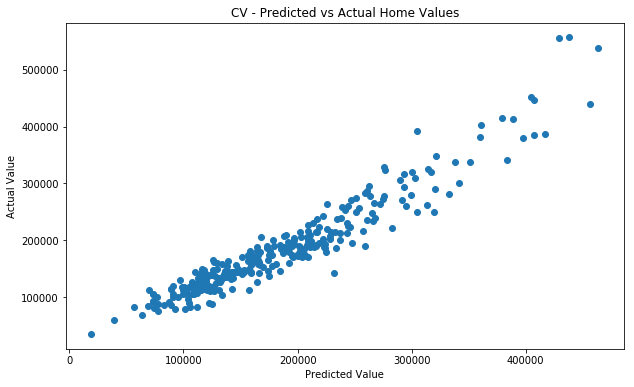

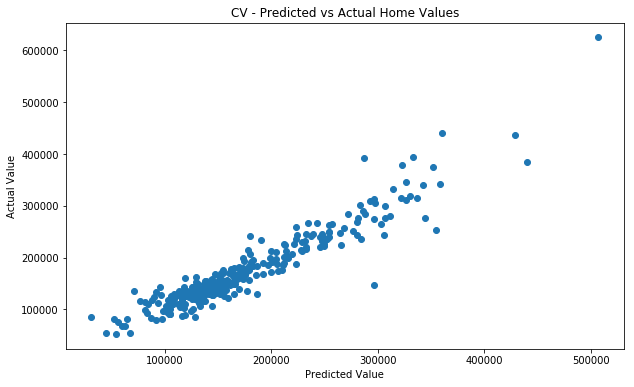

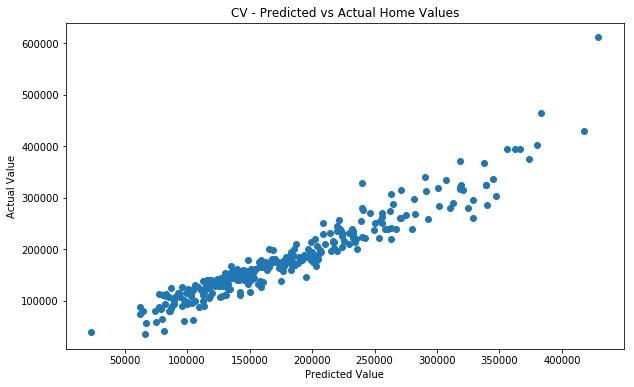

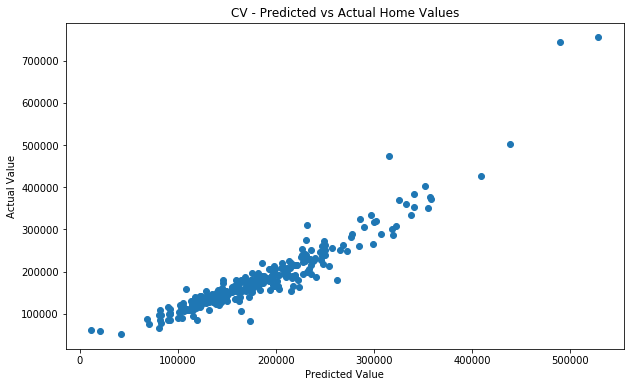

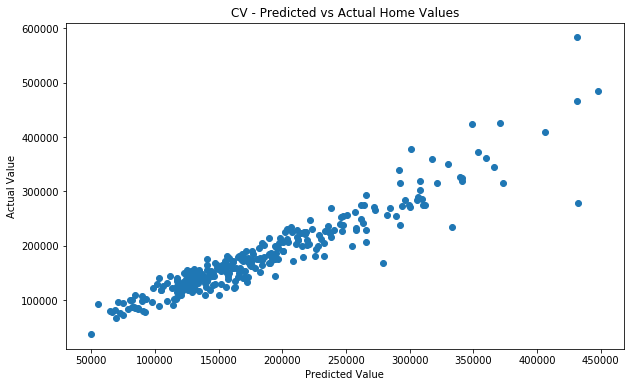

In [57]:
#Plot the predicted vs actual 'SalePrice' values for each of the 5 runs:
import matplotlib.pyplot as plt

for i in range(len(PredictList)):

    plt.figure(figsize=(10,6))
    plt.scatter(PredictList[i], ActualList[i])
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('CV - Predicted vs Actual Home Values')   
    plt.show()

In [58]:
#Just out of curiousity, what would this look like for only 2 folds (50/50 split between groups?)
ms_k2 = ms.KFold(n_splits=2, shuffle=True)

#Perform separate train/test validation runs for each of the 5 K-fold groups:

#Create X and Y variables
X = AmesDF.drop('SalePrice', axis=1)
Y = AmesDF['SalePrice']

#Instantiate the K-fold generator object:
np.random.seed(0)
AmesDF2Fold = ms_k2.split(AmesDF.drop('SalePrice', axis=1), AmesDF['SalePrice'])

#Produce list of test R^2 scores, and Actual vs Predicted lists for the individual runs
R2ListN2 = []
PredictListN2 = []
ActualListN2 = []

for train, test in AmesDF2Fold:
    lm.fit(X.iloc[train,], Y[train])
    p = lm.predict(X.iloc[test,])
    R2 = lm.score(X.iloc[test,], Y[test])
    R2ListN2.append(R2)
    PredictListN2.append(p)
    ActualListN2.append(Y[test])

In [59]:
#What are the R^2 scores for each of our 2 runs? Still a fairly good 79% and 86% R^2 value.
R2ListN2

[0.8929321085336246, 0.9050338211383224]

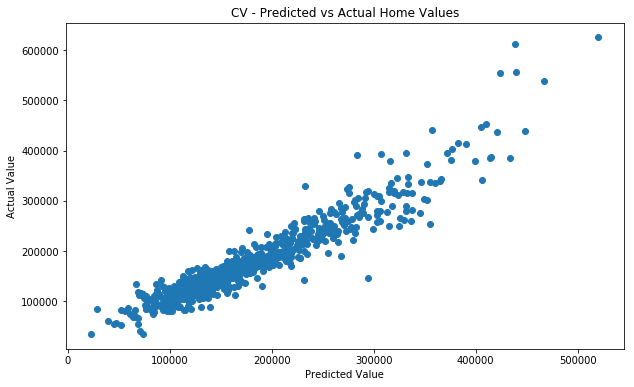

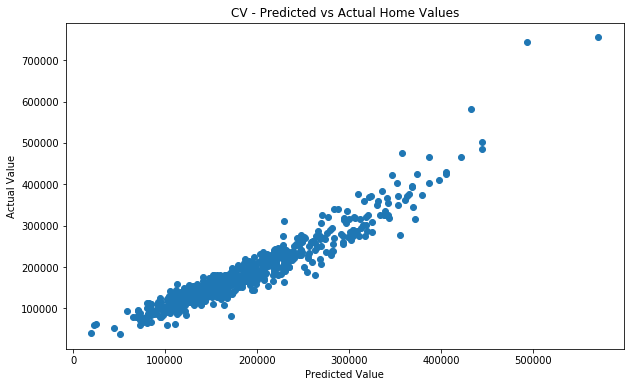

In [60]:
#Let's plot these:
for i in range(len(PredictListN2)):

    plt.figure(figsize=(10,6))
    plt.scatter(PredictListN2[i], ActualListN2[i])
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('CV - Predicted vs Actual Home Values')
    plt.show()